In [1]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

loading MHR


/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def pr_hs(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['hits'] )
    except:
        return 0

def pr_len(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['word_count'] )
    except:
        return 0
    
def hs_len(r): 
    try:
        return ( 1 / r['hits'] ) + ( 1 / r['word_count'] )
    except:
        return 0

def pr_hs_len(r): 
    try:
        return ( 1 / r['pr_hs'] ) + ( 1 / r['hs_len'] )
    except:
        return 0

In [3]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
#list_asin = ['B00BGA9WK2','B00A3YN0Z0','B0074BW614','B00CMQTVK0','B0094NY3R0','B0045FM6SU','B00DVFLJDS']
#reviews_features = reviews_features[reviews_features.asin.isin(list_asin)]

#reviews_features.shape

def helpf(x):
    x = str(x['helpful']) 
    try:
        pos = x.replace("[","").replace("]","").split(',')[0]
        neg = x.replace("[","").replace("]","").split(',')[1]
        tot = x.replace("[","").replace("]","").split(',')[1]
        return float ( float(pos) /  float(tot) )
    except:
        return 0

def tot(x): 
    x = str(x['helpful'])
    #print x.replace("[","").replace("]","").split(',')[1]
    try:
        return int(x.replace("[","").replace("]","").split(', ')[1])
    except:
        return 0



reviews_features['helpfulness']=reviews_features.apply(helpf,axis=1)
reviews_features['tot']=reviews_features.apply(tot,axis=1)


reviews_features,ndcg_mrr_1 = mhr.executeFromDf(reviews_features, 0.9, -0.12, 1)
reviews_features,ndcg_mrr_3 = mhr.executeFromDf(reviews_features, 0.9, -0.12, 3)
reviews_features,ndcg_mrr_5 = mhr.executeFromDf(reviews_features, 0.9, -0.12, 5)

product=1400532655 ndcg=1.0 (1.0)
product=B00000J061 ndcg=1.0 (1.0)
product=B00001P4ZH ndcg=0.97619047619 (0.928571428571)
product=B00001WRSJ ndcg=0.982142857143 (1.0)
product=B000031KIM ndcg=0.965201465201 (0.897435897436)
product=B00004SB92 ndcg=0.971001221001 (1.0)
product=B00004THCZ ndcg=0.964939822083 (0.928571428571)
product=B00004XOM3 ndcg=0.969322344322 (1.0)
product=B00004ZCJE ndcg=0.966724966725 (0.945945945946)
product=B000053HC5 ndcg=0.945052470052 (0.75)
product=B000053HH5 ndcg=0.950047700048 (1.0)
product=B00005LEN4 ndcg=0.95421039171 (1.0)
product=B000062VUO ndcg=0.952238163777 (0.928571428571)
product=B00006B7DA ndcg=0.95279258065 (0.96)
product=B00006HMPK ndcg=0.952018173312 (0.941176470588)
product=B00006I53S ndcg=0.951727563796 (0.947368421053)
product=B00006I53X ndcg=0.934283143208 (0.655172413793)
product=B00006IS4X ndcg=0.937934079696 (1.0)
product=B00006RVPW ndcg=0.941200707081 (1.0)
product=B00007E7JU ndcg=0.939140671727 (0.9)
product=B00007EDZG ndcg=0.940904948

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (10,11,17,19,20,21,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
reviews_features['pr_hs']=reviews_features.apply(pr_hs,axis=1)
reviews_features['pr_len']=reviews_features.apply(pr_len,axis=1)
reviews_features['hs_len']=reviews_features.apply(hs_len,axis=1)
reviews_features['pr_hs_len']=reviews_features.apply(pr_hs_len,axis=1)
#reviews_features.to_csv('data/eletronic_sample_counts.csv.gz', compression='gzip')
reviews_features.shape

(19756, 34)

pr_hs ndcg=0.475004895786
pr_len ndcg=0.472343549565
hs_len ndcg=0.476295599033
pr_hs_len ndcg=0.871843766276
PageRank ndcg=0.87155497918
HITs ndcg=0.871770213457
MHR ndcg=0.885789138009
MHRs ndcg=0.866295029108
RevRank ndcg=0.721095030303
383
383
383
383
383
383
383
383
383


/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


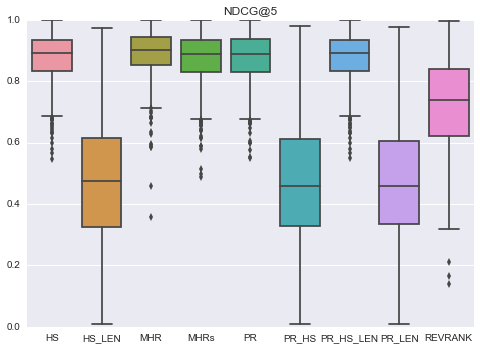

In [5]:
import seaborn as sns
k=5

ndcg_pr_hs=ndcg.calc_ndcg(reviews_features,'pr_hs',k) 
corr_pr_hs=ndcg.calc_corr(reviews_features,'pr_hs') 
print ("pr_hs ndcg="+str(np.mean(ndcg_pr_hs)))

ndcg_pr_len=ndcg.calc_ndcg(reviews_features,'pr_len',k) 
corr_pr_len=ndcg.calc_corr(reviews_features,'pr_len') 
print ("pr_len ndcg="+str(np.mean(ndcg_pr_len)))

ndcg_hs_len=ndcg.calc_ndcg(reviews_features,'hs_len',k) 
corr_hs_len=ndcg.calc_corr(reviews_features,'hs_len') 
print ("hs_len ndcg="+str(np.mean(ndcg_hs_len)))

ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',k) 
corr_pr_hs_len=ndcg.calc_corr(reviews_features,'pr_hs_len') 
print ("pr_hs_len ndcg="+str(np.mean(ndcg_pr_hs_len)))

ndcg_pr=ndcg.calc_ndcg(reviews_features,'pageRank',k) 
corr_pr=ndcg.calc_corr(reviews_features,'pageRank') 
print ("PageRank ndcg="+str(np.mean(ndcg_pr)))

ndcg_hs=ndcg.calc_ndcg(reviews_features,'hits',k) 
corr_hs=ndcg.calc_corr(reviews_features,'hits') 
print ("HITs ndcg="+str(np.mean(ndcg_hs)))

#ndcg_mhr=ndcg.calc_ndcg(reviews_features,'powerWithStar',k) 
corr_mhr=ndcg.calc_corr(reviews_features,'powerWithStar') 
print ("MHR ndcg="+str(np.mean(ndcg_mrr_5)))

ndcg_mhrs=ndcg.calc_ndcg(reviews_features,'MHRs',k) 
corr_mhrs=ndcg.calc_corr(reviews_features,'MHRs') 
print ("MHRs ndcg="+str(np.mean(ndcg_mhrs)))

ndcg_revRank=ndcg.calc_ndcg(reviews_features,'revRank',k) 
corr_revRank=ndcg.calc_corr(reviews_features,'revRank') 
print ("RevRank ndcg="+str(np.mean(ndcg_revRank)))

print (len(ndcg_pr_hs))
print (len(ndcg_pr_len))
print (len(ndcg_hs_len))
print (len(ndcg_pr_hs_len))
print (len(ndcg_hs))
print (len(ndcg_pr))
print (len(ndcg_mrr_5))
print (len(ndcg_mhrs))
print (len(ndcg_revRank))

tip={}
tip['PR_HS']=ndcg_pr_hs
tip['PR_LEN']=ndcg_pr_len
tip['HS_LEN']=ndcg_hs_len
tip['PR_HS_LEN']=ndcg_pr_hs_len
tip['HS']=ndcg_hs
tip['PR']=ndcg_pr
tip['MHR']=ndcg_mrr_5
tip['MHRs']=ndcg_mhrs
tip['REVRANK']=ndcg_revRank
df = pd.DataFrame(tip)
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=df, color=".25")
ax.set_title('NDCG@'+str(k))

[None, None, None, None, None, None, None, None, None, None, None, None]

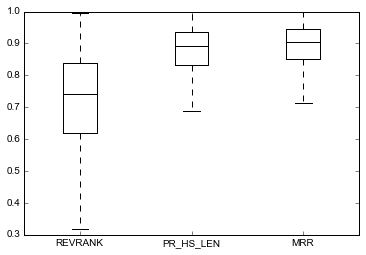

In [6]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt 
%matplotlib inline
data_to_plot = [ndcg_revRank, ndcg_pr_hs_len, ndcg_mrr_5]


bp = plt.boxplot(data_to_plot, labels=["REVRANK","PR_HS_LEN","MRR"], sym='')
plt.setp(bp['boxes'], linewidth=1, color='black')
plt.setp(bp['fliers'], linewidth=1, color='black')
plt.setp(bp['medians'], linewidth=1, color='black')
plt.setp(bp['whiskers'], linewidth=1, color='black')


In [7]:
ndcg_pr_hs_len1=ndcg.calc_ndcg(reviews_features,'pr_hs_len',1) 
print("pr_hs_len ndcg 1="+str(np.mean(ndcg_pr_hs_len1)))
ndcg_pr_hs_len3=ndcg.calc_ndcg(reviews_features,'pr_hs_len',3) 
print( "pr_hs_len ndcg 3="+str(np.mean(ndcg_pr_hs_len3)))
ndcg_pr_hs_len5=ndcg.calc_ndcg(reviews_features,'pr_hs_len',5) 
print("pr_hs_len ndcg 5="+str(np.mean(ndcg_pr_hs_len5)))

pr_hs_len ndcg 1=0.874340791932
pr_hs_len ndcg 3=0.873254288365
pr_hs_len ndcg 5=0.871843766276


In [8]:
ndcg_revRank1=ndcg.calc_ndcg(reviews_features,'revRank',1) 
print("revRank ndcg 1="+str(np.mean(ndcg_revRank1)))
ndcg_revRank3=ndcg.calc_ndcg(reviews_features,'revRank',3) 
print("revRank ndcg 3="+str(np.mean(ndcg_revRank3)))
ndcg_revRank5=ndcg.calc_ndcg(reviews_features,'revRank',5) 
print( "revRank ndcg 5="+str(np.mean(ndcg_revRank5)))

revRank ndcg 1=0.682560187061
revRank ndcg 3=0.719735015545
revRank ndcg 5=0.721095030303


In [9]:
ndcg_mhr1=ndcg.calc_ndcg(reviews_features,'powerWithStar',1) 
print("MRR ndcg 1="+str(np.mean(ndcg_mhr1)))
ndcg_mhr3=ndcg.calc_ndcg(reviews_features,'powerWithStar',3) 
print("MRR ndcg 3="+str(np.mean(ndcg_mhr3)))
ndcg_mhr5=ndcg.calc_ndcg(reviews_features,'powerWithStar',5) 
print( "MRR ndcg 5="+str(np.mean(ndcg_mhr5)))

MRR ndcg 1=0.825600556087
MRR ndcg 3=0.834538783788
MRR ndcg 5=0.834170018255


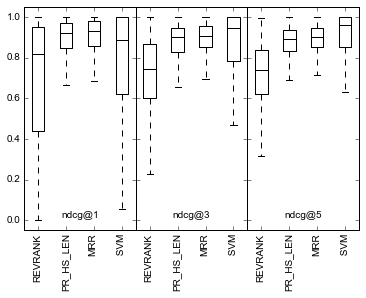

In [27]:
ndcg_1_svm= np.array(pd.read_csv('data/ndcg_1_svm.csv').values.tolist())[:,1]
ndcg_3_svm= np.array(pd.read_csv('data/ndcg_3_svm.csv').values.tolist())[:,1]
ndcg_5_svm= np.array(pd.read_csv('data/ndcg_5_svm.csv').values.tolist())[:,1]

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt 
%matplotlib inline
data_to_plot = [ndcg_revRank1, ndcg_pr_hs_len1, ndcg_mrr_1, ndcg_revRank3, ndcg_pr_hs_len3, ndcg_mrr_3, ndcg_revRank5, ndcg_pr_hs_len5, ndcg_mrr_5]


#bp = plt.boxplot(data_to_plot, labels=["R@1","P@1","M@1","R@3","P@3","M@3","R@5","P@5","M@5"], sym='')


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.subplots_adjust(wspace=0)

data={}
data['ndcg@1']=[ndcg_revRank1, ndcg_pr_hs_len1, ndcg_mrr_1, ndcg_1_svm]
data['ndcg@3']=[ndcg_revRank3, ndcg_pr_hs_len3, ndcg_mrr_3, ndcg_3_svm]
data['ndcg@5']=[ndcg_revRank5, ndcg_pr_hs_len5, ndcg_mrr_5, ndcg_5_svm]
#for ax, name in zip(axes, ['ndcg@1', 'ndcg@3', 'ndcg@5']):
#    ax.boxplot(data[name])
#    ax.set(xticklabels=['revRank', 'pr_hs_len', 'MRR'], xlabel=name)
#    ax.margins(0.05) # Optional
    
bp1=ax1.boxplot(data['ndcg@1'],sym='')

ax1.set(xticklabels=['REVRANK', 'PR_HS_LEN', 'MRR', ' SVM'], xlabel='ndcg@1')
ax1.XTickLabelRotation=45
ax1.margins(0.5) # Optional
plt.setp(bp1['boxes'], linewidth=1, color='black')
plt.setp(bp1['fliers'], linewidth=1, color='black')
plt.setp(bp1['medians'], linewidth=1, color='black')
plt.setp(bp1['whiskers'], linewidth=1, color='black')

for i in range(3):
    med = bp1['medians'][i]
    #ax1.plot([np.mean(med.get_xdata())], [np.mean(data['ndcg@1'][i])], color='k', marker='*', markeredgecolor='k')




bp2=ax2.boxplot(data['ndcg@3'],sym='')
ax2.set(xticklabels=['REVRANK', 'PR_HS_LEN', 'MRR', ' SVM'], xlabel='ndcg@3')
ax2.margins(0.05) # Optional
plt.setp(bp2['boxes'], linewidth=1, color='black')
plt.setp(bp2['fliers'], linewidth=1, color='black')
plt.setp(bp2['medians'], linewidth=1, color='black')
plt.setp(bp2['whiskers'], linewidth=1, color='black')
for i in range(3):
    med = bp2['medians'][i]
    #ax2.plot([np.mean(med.get_xdata())], [np.mean(data['ndcg@3'][i])], color='k', marker='*', markeredgecolor='k')





bp3=ax3.boxplot(data['ndcg@5'],sym='')
ax3.set(xticklabels=['REVRANK', 'PR_HS_LEN', 'MRR', ' SVM'], xlabel='ndcg@5')
ax3.margins(0.05) # Optional
plt.setp(bp3['boxes'], linewidth=1, color='black')
plt.setp(bp3['fliers'], linewidth=1, color='black')
plt.setp(bp3['medians'], linewidth=1, color='black')
plt.setp(bp3['whiskers'], linewidth=1, color='black')

for i in range(3):
    med = bp3['medians'][i]
    #ax3.plot([np.mean(med.get_xdata())], [np.mean(data['ndcg@5'][i])], color='k', marker='*', markeredgecolor='k')





ax1.xaxis.labelpad = -80
ax2.xaxis.labelpad = -80
ax3.xaxis.labelpad = -80



for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

    
# plt.figtext(0.80, 0.5, '*', color='k', backgroundcolor='gray',
#             weight='roman', size='medium')
# plt.figtext(0.815, 0.5, ' Mean Value', color='black', weight='roman',
#             size='medium', backgroundcolor='gray',)
    
plt.show()
